In [10]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
import yfinance as yf
import altair as alt
import plotly.graph_objects as go
from pathlib import Path
# Load .env enviroment variables
from dotenv import load_dotenv

%run FetchData.ipynb

load_dotenv()

True

In [11]:
def get_top_10_stock_list():
    marketcap_csv_path = Path("Resources/marketcap.csv")
    marketcap_df = pd.read_csv(marketcap_csv_path)
    ticker_marketcap_df = marketcap_df.loc[:, ['Year','Ticker', 'MarketCap(USD Millions)']]
    #ticker_marketcap_df.sort_values("Ticker")

    ticker_marketcap_df['MarketCap(USD Millions)'].replace(',','', regex=True, inplace=True)
    ticker_marketcap_df['MarketCap(USD Millions)'] = ticker_marketcap_df['MarketCap(USD Millions)'].astype(int)
    #ticker_marketcap_df['MarketCap(USD Millions)'] = ticker_marketcap_df['MarketCap(USD Millions)'].apply(pd.to_numeric)
    ticker_marketcap_df = ticker_marketcap_df[ticker_marketcap_df['MarketCap(USD Millions)'] != 0]
    return ticker_marketcap_df


In [12]:
ticker_marketcap_df = get_top_10_stock_list()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd02382e450>,
      dtype=object)

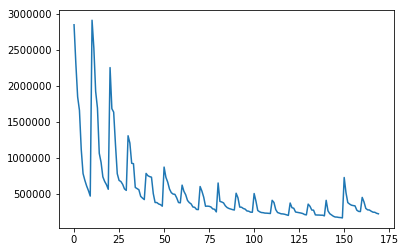

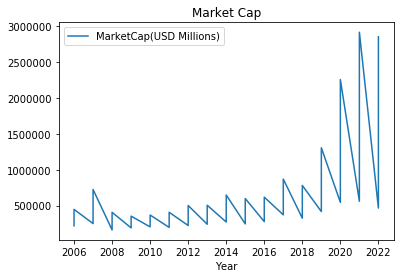

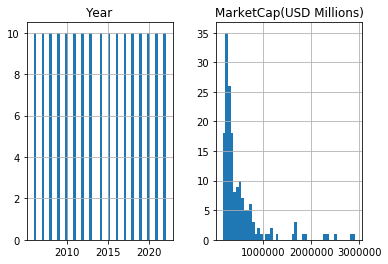

In [13]:
ticker_marketcap_df['MarketCap(USD Millions)'].plot()
ticker_marketcap_df.plot.line(x="Year", title="Market Cap");
ticker_marketcap_df.hist(bins=50)

In [14]:
year_list = list(ticker_marketcap_df['Year'].unique())

In [15]:
input_dropdown = alt.binding_select(options=year_list)
selection = alt.selection_single(fields=['Year'], bind=input_dropdown, name='Year')
alt_plot = alt.Chart(ticker_marketcap_df).mark_line().encode(
    x='Ticker',
    y='MarketCap(USD Millions)',
    tooltip='MarketCap(USD Millions)'
).add_selection(
    selection
).transform_filter(
    selection
)
alt_plot

alt.Chart(...)

In [21]:
def dashboard_top_10_stocks():
    fig = go.Figure()
    for year in year_list:
        fig.add_trace(
            go.Bar(
                x = ticker_marketcap_df['Ticker'][ticker_marketcap_df['Year']==year],
                y = ticker_marketcap_df['MarketCap(USD Millions)'][ticker_marketcap_df['Year']==year],
                name = str(year), visible = True,
                offsetgroup=1,
                text = ticker_marketcap_df['MarketCap(USD Millions)']/100000,
                orientation='v'
                )
            )

    buttons = []

    for i, year in enumerate(year_list):
        args = [False] * len(year_list)
        args[i] = True

        button = dict(label = str(year),
                      method = "update",
                      args=[{"visible": args}])
        buttons.append(button)

    fig.update_layout(
        title="Choose Year",
        updatemenus=[dict(
                        active=0,
                        type="dropdown",
                        buttons=buttons,
                        x = 0,
                        y = 1.1,
                        xanchor = 'left',
                        yanchor = 'bottom'
                        )
                    ],
    autosize=False,
    width=1000,
    height=500,
    yaxis_title="Market Cap",
    xaxis_title="Stocks Leaders",
    )

    fig.update_traces(texttemplate='%{text:.2f}M', textposition='inside')
    
    return fig

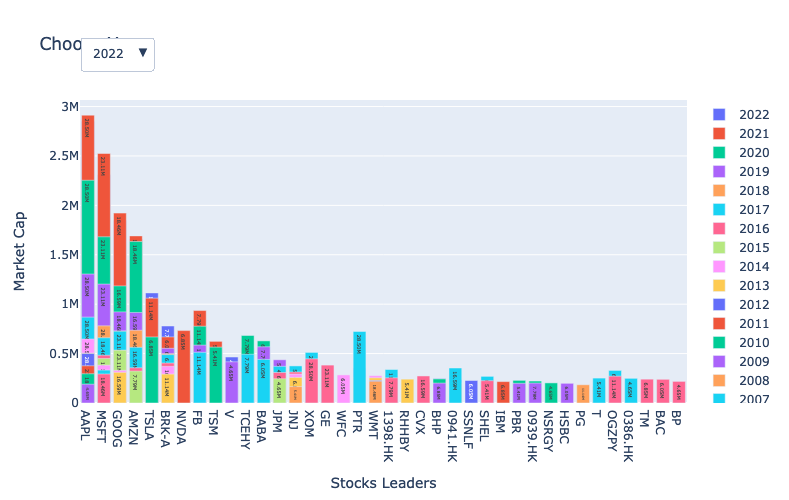

In [17]:
fig = dashboard_top_10_stocks()
fig.show()